In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset
train = pd.read_csv('Dataset - Problem 2/train.csv',header=None)
test = pd.read_csv('Dataset - Problem 2/test.csv',header=None)

In [3]:
# Check if training dataset contains null values
all(train.isnull().sum()==0)

True

In [4]:
# Check if test dataset contains null values
all(test.isnull().sum()==0)

True

In [5]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,447095,3452,111,22,433,214,3677,252,210,74,...,0,0,0,0,0,0,0,1,0,0
1,113427,3093,95,9,124,7,4115,234,227,124,...,0,0,0,0,0,0,0,0,0,1
2,66435,2551,61,17,90,5,726,231,202,98,...,0,0,0,0,0,0,0,0,0,1
3,8957,2944,135,3,430,13,1868,224,238,149,...,0,0,0,0,0,0,0,0,0,1
4,434631,3030,327,34,277,101,1973,120,181,190,...,0,1,0,0,0,0,0,0,0,1


In [6]:
# Checking the ratio of target variables to check if its imbalanced or not
train[55].value_counts()

0    208352
1    198357
Name: 55, dtype: int64

## Visualization

In [7]:
def drawPlots(column):
    f, axes = plt.subplots(1, 3,figsize=(13,5))
    sns.boxplot(y=train[column],x=train[55], ax=axes[0])
    sns.violinplot(y=train[column],xa=train[55], ax=axes[1])
    sns.boxplot(train[column], ax=axes[2])

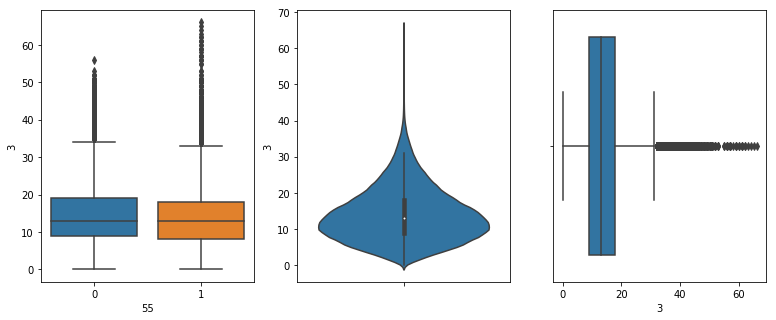

In [8]:
drawPlots(3)

In [9]:
# Dropping the outliers
train = train.drop(train[(train[3]>=33) 
                         & (train[55]==0)].index).reset_index(drop=True)
train = train.drop(train[(train[3]>=31) 
                         & (train[55]==1)].index).reset_index(drop=True)

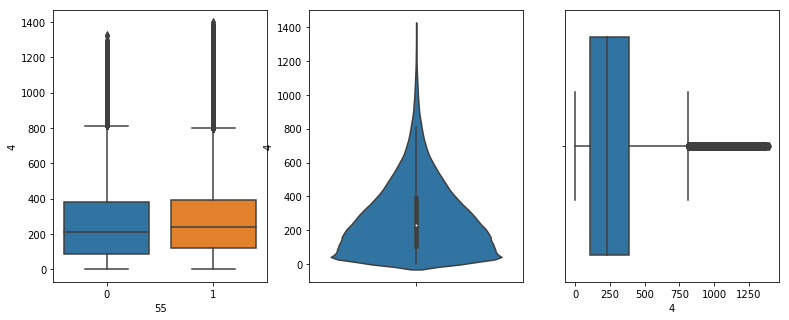

In [10]:
drawPlots(4)

In [11]:
# Dropping the outliers
train = train.drop(train[(train[4]>=1300) 
                         & (train[55]==1)].index).reset_index(drop=True)
train = train.drop(train[(train[4]>=1290) 
                         & (train[55]==0)].index).reset_index(drop=True)

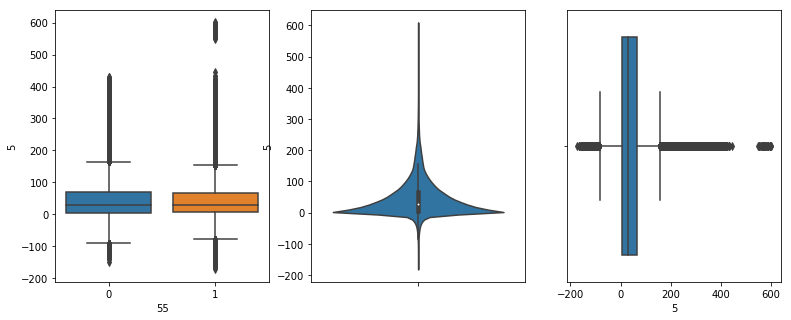

In [12]:
drawPlots(5)

In [13]:
# Dropping the outliers
train = train.drop(train[(train[5]>=390)
                         & (train[55]==1)].index).reset_index(drop=True)
train = train.drop(train[(train[5]<=-140)].index).reset_index(drop=True)
train = train.drop(train[(train[5]>=400)
                         & (train[55]==0)].index).reset_index(drop=True)

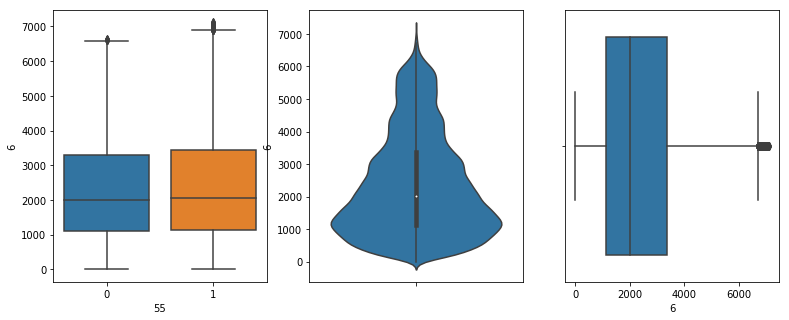

In [14]:
drawPlots(6)

In [15]:
# Dropping the outliers
train = train.drop(train[(train[6]>=6700)
                         & (train[55]==1)].index).reset_index(drop=True)
train = train.drop(train[(train[6]>=6550)
                         & (train[55]==0)].index).reset_index(drop=True)

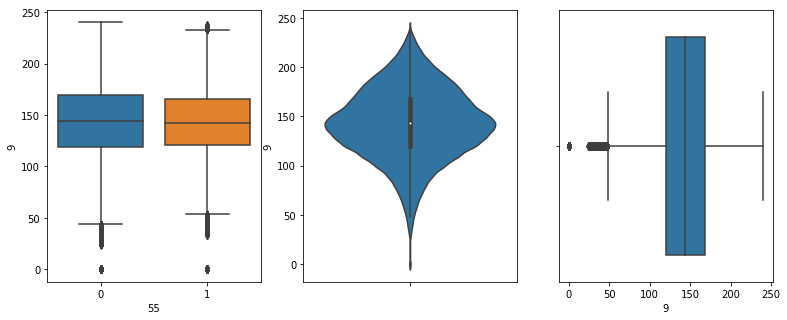

In [16]:
drawPlots(9)

In [17]:
# Dropping the outliers
train = train.drop(train[(train[9]>=230)
                         & (train[55]==1)].index).reset_index(drop=True)
train = train.drop(train[(train[9]==0)
                         & (train[55]==0)].index).reset_index(drop=True)
train = train.drop(train[(train[9]==0)
                         & (train[55]==1)].index).reset_index(drop=True)

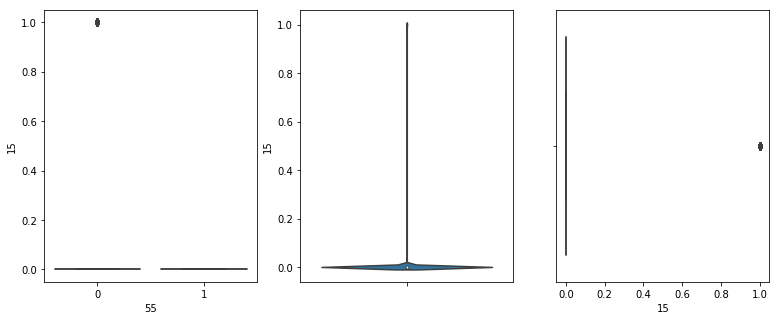

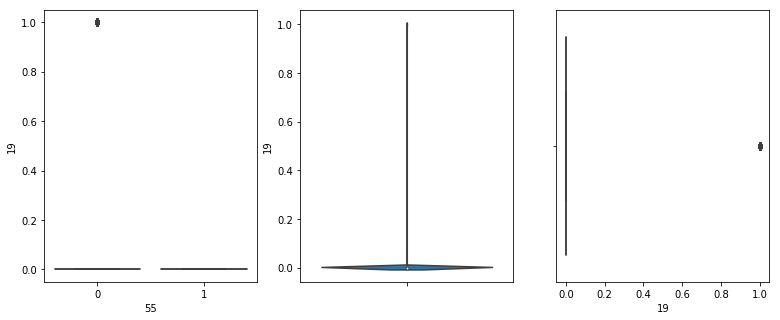

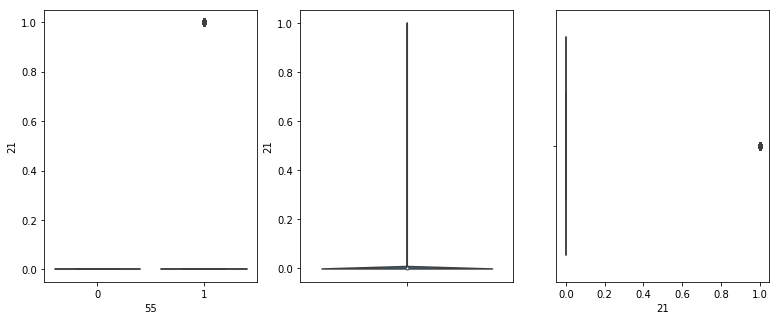

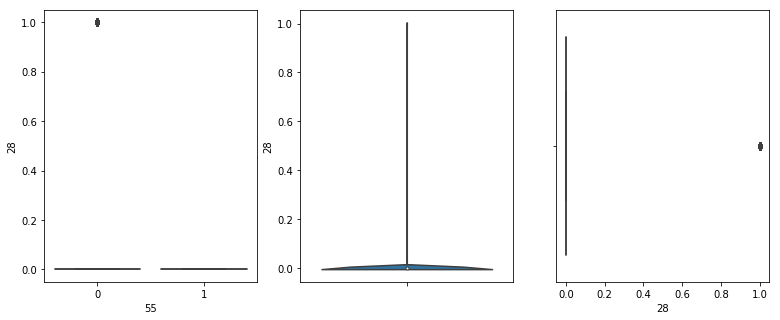

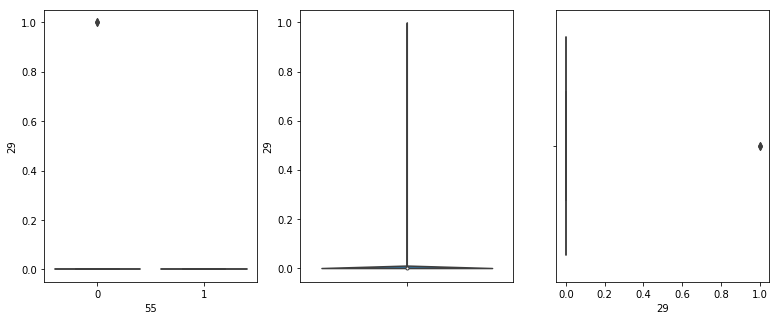

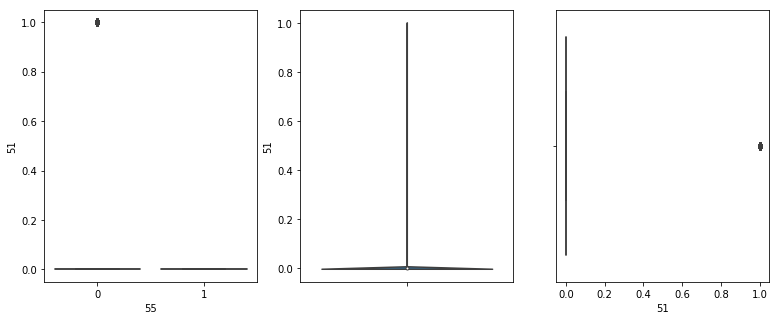

In [18]:
for i in [15,19,21,28,29,51]:
    drawPlots(i)

In [19]:
for i in [15,19,21,28,29,51]:
    print("Feature",i)
    #print("Label with 0 value:\n",train[i][train[55]==0].value_counts())
    print("Label with 1 value:\n",train[i][train[55]==1].value_counts())

Feature 15
Label with 1 value:
 0    192737
Name: 15, dtype: int64
Feature 19
Label with 1 value:
 0    192737
Name: 19, dtype: int64
Feature 21
Label with 1 value:
 0    192664
1        73
Name: 21, dtype: int64
Feature 28
Label with 1 value:
 0    192737
Name: 28, dtype: int64
Feature 29
Label with 1 value:
 0    192737
Name: 29, dtype: int64
Feature 51
Label with 1 value:
 0    192737
Name: 51, dtype: int64


Above binary features had '0' binary value realted to binary label 1 only. And '1' binary value is related to both label. So we cant establish a relationship between them. Therefore, Dropping these features 

In [20]:
train = train.drop([15,19,21,28,29,51],axis=1)
test = test.drop([15,19,21,28,29,51],axis=1)

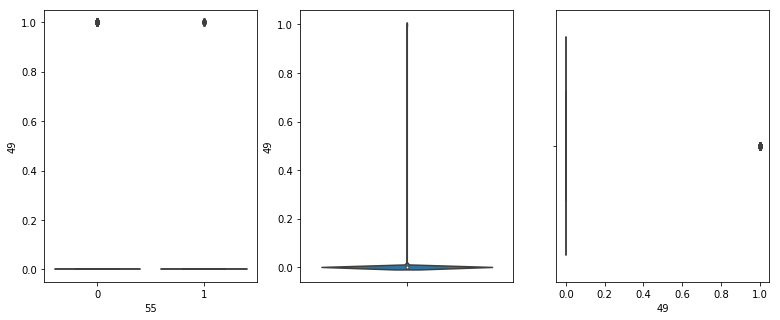

In [21]:
drawPlots(49)

In [22]:
# Dropping the outliers
train = train.drop(train[(train[49]==1)
                         & (train[55]==1)].index).reset_index(drop=True)

Drawing heatmap between continuous variable with correlation coefficient is Pearson.

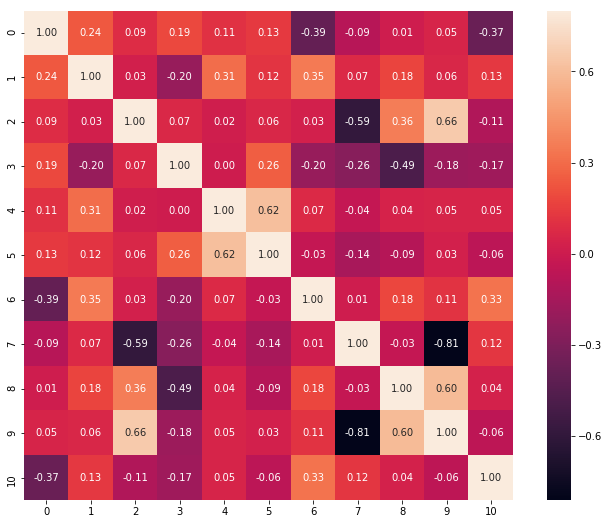

In [23]:
corrmat = train[[0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, fmt="0.2f",annot= True, square=True);

Drawing heatmap between categorical variable with correlation coefficient is Kendall.

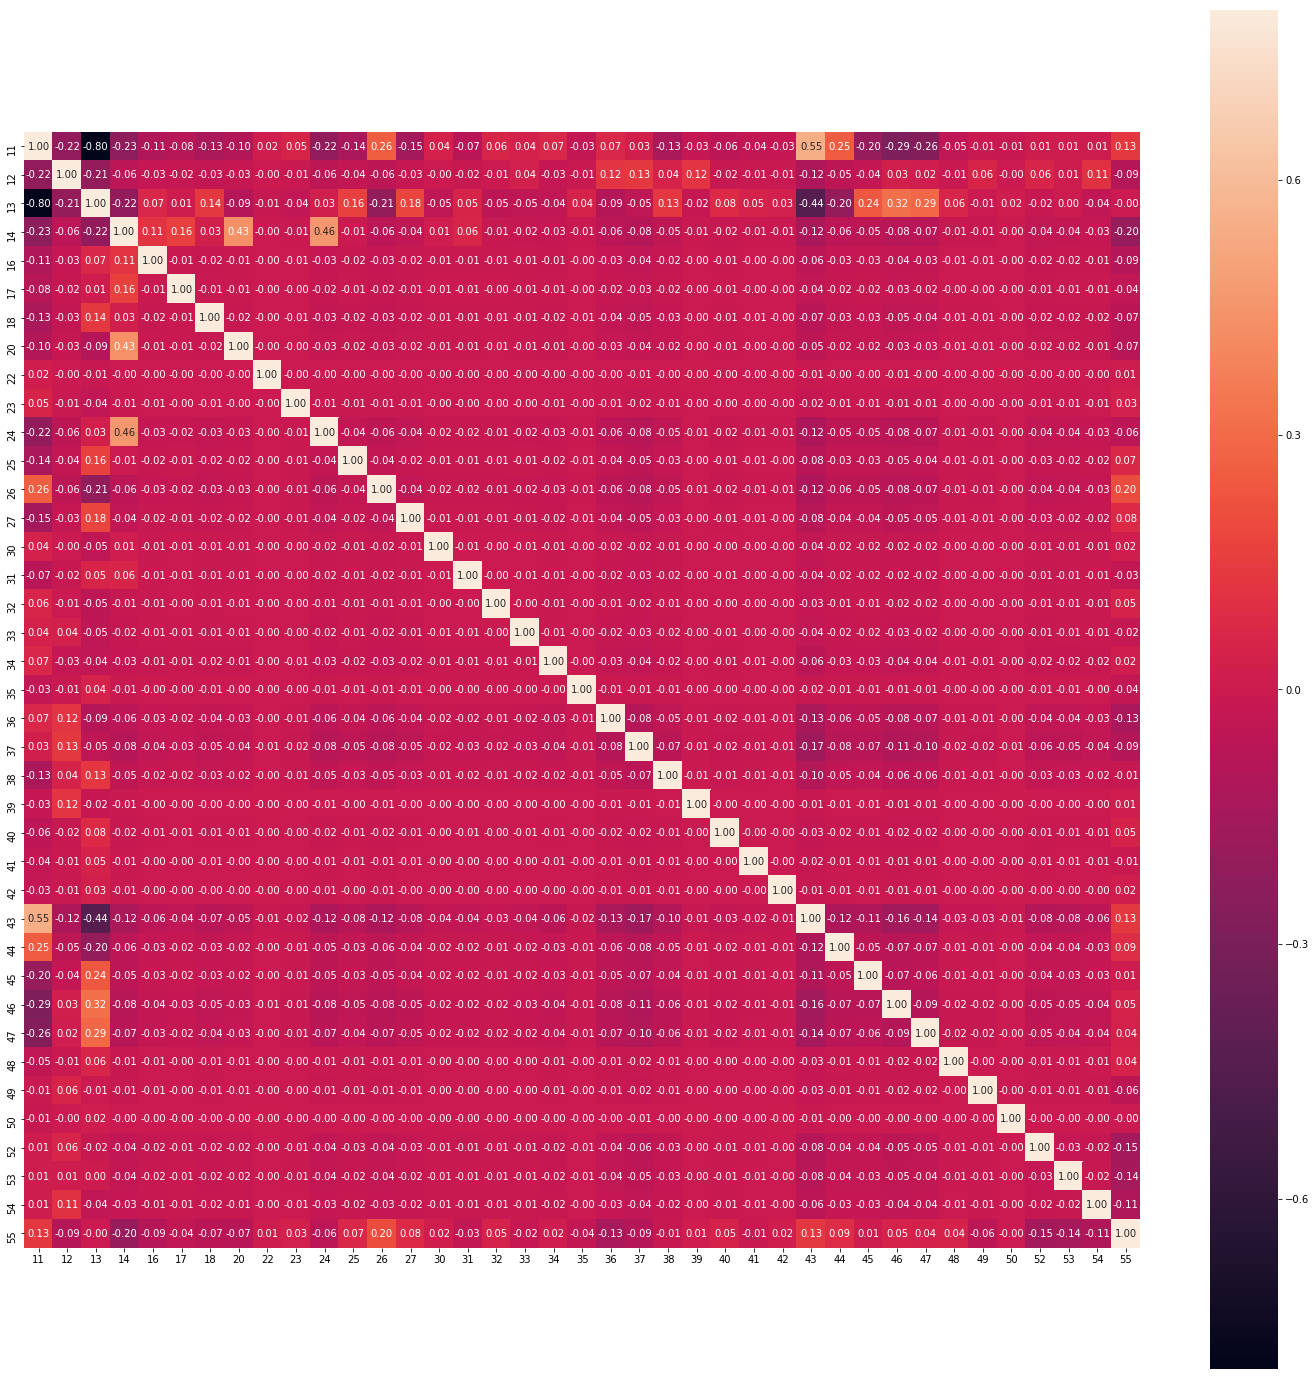

In [24]:
corrmat = train[[11, 12, 13, 14, 16, 17,
            18, 20, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            52, 53, 54, 55]].corr(method="kendall")
f, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corrmat, vmax=.8, fmt="0.2f",annot= True, square=True);

In [25]:
# Dropping feature that has negative 0.80 correlation.
train = train.drop([7,11],axis=1)
test = test.drop([7,11],axis=1)

Eliminationg these features Null Hypothesis Rejection

In [26]:
train = train.drop([2,8],axis=1)
test = test.drop([2,8],axis=1)

In [27]:
# Seperating the feature and target variable after data cleaning
y_train = train[55]
X_train = train.drop(55,axis=1)

In [28]:
# Converting the dataframe to numpy array
X_train = X_train.as_matrix()
X_test = test.as_matrix()

C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Modelling

In [29]:
# Importing Libraries for modelling
from sklearn.metrics import roc_curve, auc,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from scipy import interp
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression,SGDClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from statistics import mean
import warnings; warnings.simplefilter('ignore')
from sklearn.svm import LinearSVC

## Evaluation Metrics

In [30]:
from __future__ import division

def accumulate_truth(iterable):
    true = 0
    false = 0
    for i in iterable:
        if i:
            true += 1
        else:
            false += 1
        yield true, false

def AUC(scores, targets):
    total_targets = sum(targets)
    length_sub_targets = len(targets) - total_targets

    scores, targets = zip(*sorted(zip(scores, targets), reverse=True))
    tprs = []
    fprs = []
    for true, false in accumulate_truth(targets):
        tprs.append(true / total_targets)
        fprs.append(false / length_sub_targets)
    
    return auc(fprs,tprs)

def LAUC(scores, targets):
    total_targets = sum(targets)
    length_sub_targets = len(targets) - total_targets

    scores, targets = zip(*sorted(zip(scores, targets), reverse=True))
    tprs = []
    fprs = []
    for true, false in accumulate_truth(targets):
        tprs.append(true / total_targets)
        fprs.append((0.95*false) / length_sub_targets)
        
    return auc(fprs,tprs)

def score(y_pred,y):
    return 0.35*AUC(y_pred, y) + 0.65*LAUC(y_pred, y)

To show confusion matrix in tabular form

In [31]:
def PlotConfusionMatrix(y_test,y_pred):
    cfn_matrix = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(5,5))
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',fmt='1',linewidths=0.5,annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()

## Cross-Validation Method

In [32]:
def cross_validation(X_train,y_train,classifier):
    mean_score =[]
    for train, test in cv.split(X_train, y_train):
        pred = classifier.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
        mean_score.append(score(pred[:, 1],y_train[test]))
    return mean(mean_score)

## Models

In [33]:
cv = StratifiedKFold(n_splits=10)
classifier_one = LogisticRegression()
classifier_two = lgb.LGBMClassifier(objective='binary')
classifier_three = RandomForestClassifier()

In [34]:
print("LogisticRegression Performace:")
cross_validation(X_train,y_train,classifier_one)
# 0.27633856719027583 0.71 score

LogisticRegression Performace:


0.6287325567054224

In [35]:
print("LGBMClassifier Performace:")
cross_validation(X_train,y_train,classifier_two)
# 0.27633856719027583 0.71 score

LGBMClassifier Performace:


0.9192080488720435

In [36]:
print("RandomForestClassifier Performace:")
cross_validation(X_train,y_train,classifier_three)
# 0.3804428312422048 0.96 score

RandomForestClassifier Performace:


0.9641742241458569

## Model After Hypertuning

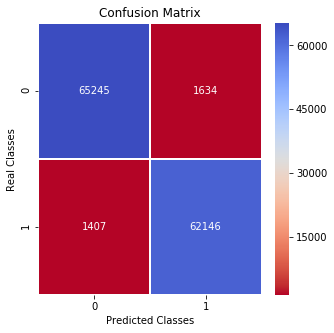

0.9669766752237113


In [37]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.33, random_state=7)
classifier_three = RandomForestClassifier(n_jobs=7,random_state=7,max_features=30,n_estimators=400,criterion='entropy')
classifier_three.fit(Xtrain,ytrain)
pred = classifier_three.predict(Xtest)
PlotConfusionMatrix(ytest,pred)
print(score(pred,ytest))

### Final Prediction

In [38]:
classifier_three = RandomForestClassifier(n_jobs=7,random_state=7,max_features=30,n_estimators=400,criterion='entropy')
classifier_three.fit(X_train,y_train)
# Predicting the test value
pred = classifier_three.predict_proba(X_test)

### Submission

In [39]:
my_submission = pd.DataFrame({'key': test[0], 'score': pred[:,1]})
my_submission.to_csv('submission.csv', index=False,columns= ['key','score'])   